Project Name: Bird Species Observation Analysis – Insights from Forest and Grassland Habitats

Project Type : Data Analytics & Visualization Project

Prepared by : Ajay Bramhankar


Project Summary: This project analyzes bird observation data collected from both forest and grassland habitats, with the goal of understanding species distribution, environmental influences, and seasonal trends. The dataset was compiled from multiple Excel files, cleaned to standardize formats, remove duplicates, and fill missing values. Using Python for exploratory data analysis, visualizations were created to highlight the top observed species, habitat comparisons, observer contributions, and relationships between environmental variables such as temperature and humidity with bird activity. Key findings indicate that grasslands slightly outperform forests in total sightings, a small set of species dominate observations, moderate environmental conditions encourage higher counts, and observer participation is uneven. These insights can guide targeted conservation efforts, improved data collection strategies, and future predictive modeling.

Github Link :- https://github.com/ajayy077/FINAL_PROJECTS

In [2]:
"""
Bird Observation Dataset Summary Report
Combines, inspects, and summarizes forest and grassland data.
"""

import pandas as pd

# Define file paths
forest_file = r"C:\Users\ajayb\Downloads\Bird_Monitoring_Data_FOREST.XLSX"
grassland_file = r"C:\Users\ajayb\Downloads\Bird_Monitoring_Data_GRASSLAND.XLSX"

# Load all non-empty sheets from both files
forest_data = pd.concat(
    [sheet for sheet in pd.read_excel(forest_file, sheet_name=None).values() if not sheet.empty],
    ignore_index=True
)

grassland_data = pd.concat(
    [sheet for sheet in pd.read_excel(grassland_file, sheet_name=None).values() if not sheet.empty],
    ignore_index=True
)

# Add habitat labels
forest_data["Habitat_Type"] = "Forest"
grassland_data["Habitat_Type"] = "Grassland"

# Combine both datasets
df = pd.concat([forest_data, grassland_data], ignore_index=True)

# Convert date field
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Display dataset overview
print("=== Dataset Overview ===")
print(f"Total Records: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")
print("\nColumns:\n", df.columns.tolist())

print("\n=== Data Types ===")
print(df.dtypes)

print("\n=== Missing Values ===")
print(df.isnull().sum())

print("\n=== Unique Values per Column ===")
print(df.nunique())

print("\n=== Sample Records ===")
print(df.head())

print("\n=== Statistical Summary (Numerical Columns) ===")
print(df.describe())

print("\n=== Statistical Summary (Categorical Columns) ===")
print(df.describe(include='object'))

print("\n=== Top 10 Bird Species ===")
print(df["Common_Name"].value_counts().head(10))

print("\n=== Top 10 Observers ===")
print(df["Observer"].value_counts().head(10))

print("\n=== Observations by Habitat ===")
print(df["Habitat_Type"].value_counts())

# Extract year from Date for temporal summary
df["Year"] = df["Date"].dt.year
print("\n=== Observations by Year ===")
print(df["Year"].value_counts().sort_index())


=== Dataset Overview ===
Total Records: 34154
Total Columns: 32

Columns:
 ['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name', 'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode', 'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status', 'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance', 'Initial_Three_Min_Cnt', 'Habitat_Type', 'TaxonCode', 'Previously_Obs']

=== Data Types ===
Admin_Unit_Code                        object
Sub_Unit_Code                          object
Site_Name                              object
Plot_Name                              object
Location_Type                          object
Year                                    int64
Date                           datetime64[ns]
Start_Time                             object
End_Time                               object
Observer        

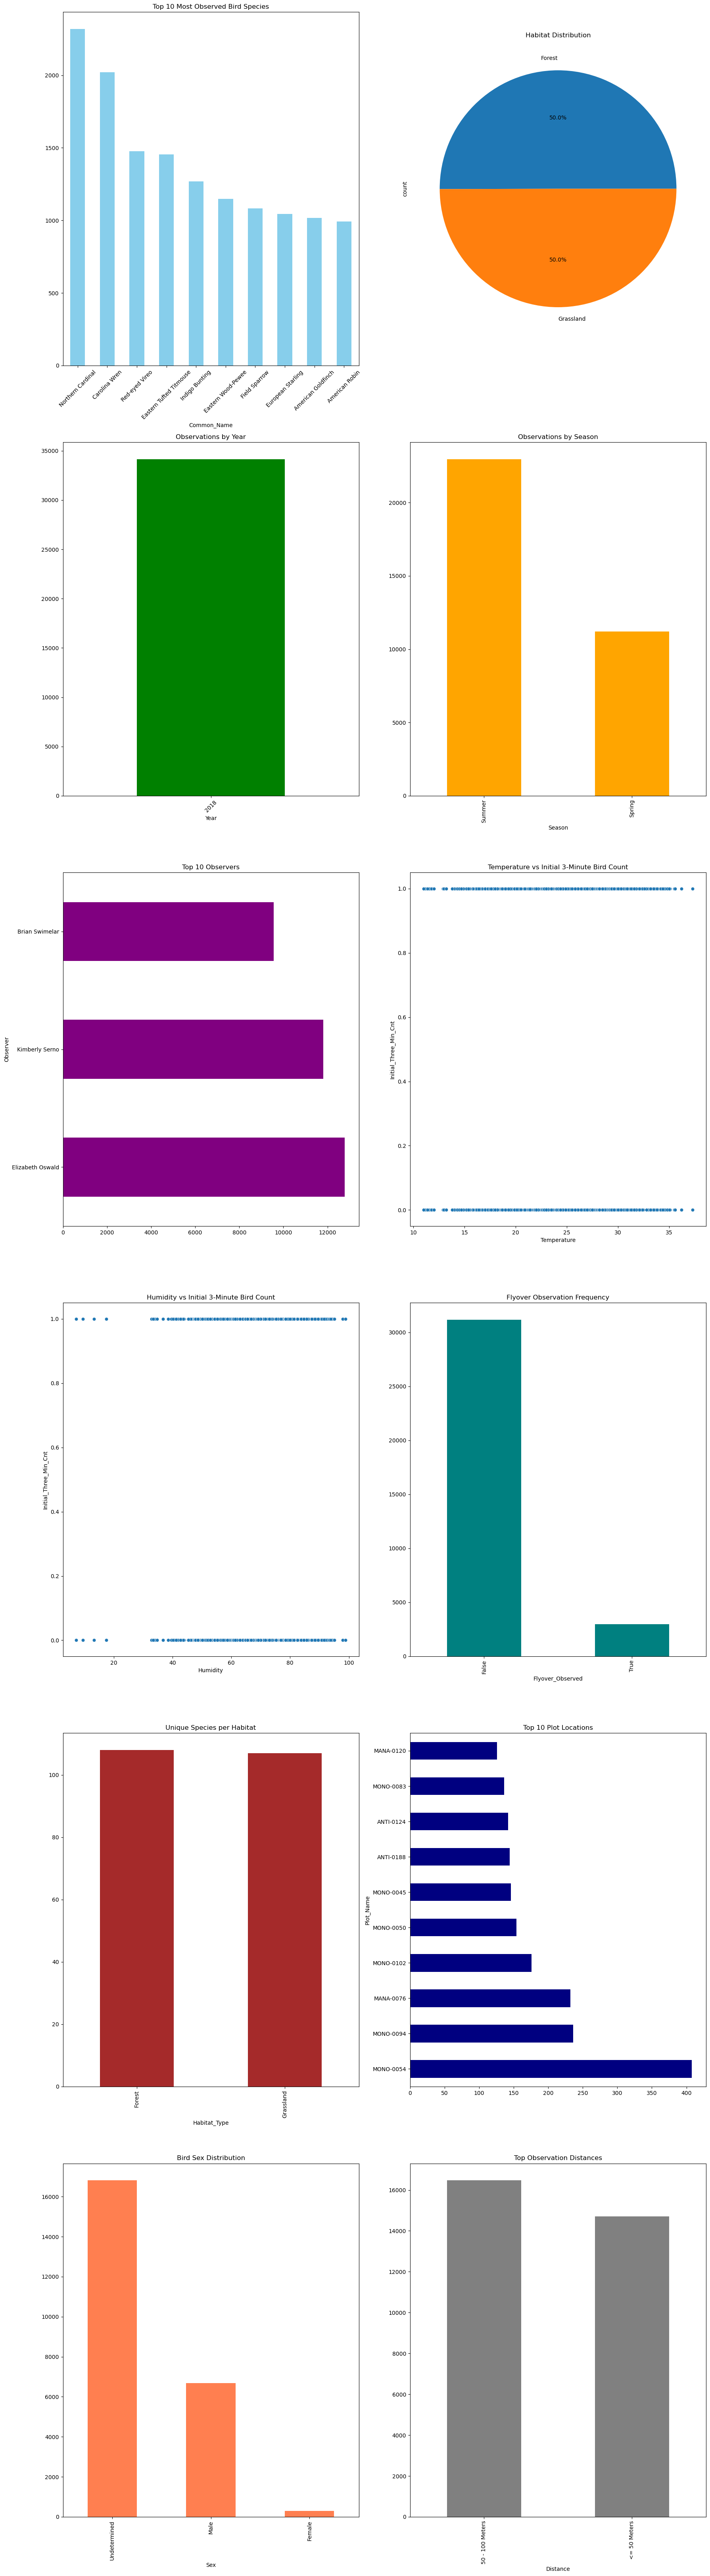

In [4]:
"""
Bird Observation EDA Visualizations
Generates 12 key visualizations from the combined dataset.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths
forest_file = r"C:\Users\ajayb\Downloads\Bird_Monitoring_Data_FOREST.XLSX"
grassland_file = r"C:\Users\ajayb\Downloads\Bird_Monitoring_Data_GRASSLAND.XLSX"

# Load and merge all sheets
forest_data = pd.concat(
    [sheet for sheet in pd.read_excel(forest_file, sheet_name=None).values() if not sheet.empty],
    ignore_index=True
)

grassland_data = pd.concat(
    [sheet for sheet in pd.read_excel(grassland_file, sheet_name=None).values() if not sheet.empty],
    ignore_index=True
)

# Tag habitat type
forest_data["Habitat_Type"] = "Forest"
grassland_data["Habitat_Type"] = "Grassland"

# Combine dataframes
df = pd.concat([forest_data, grassland_data], ignore_index=True)

# Convert date field and extract time features
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Season"] = df["Month"].map({
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Fall", 10: "Fall", 11: "Fall"
})

# Plot setup
plt.figure(figsize=(18, 65))

# 1. Top 10 Bird Species
plt.subplot(6, 2, 1)
df["Common_Name"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Observed Bird Species")
plt.xticks(rotation=45)

# 2. Habitat Distribution
plt.subplot(6, 2, 2)
df["Habitat_Type"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Habitat Distribution")

# 3. Yearly Observations
plt.subplot(6, 2, 3)
df["Year"].value_counts().sort_index().plot(kind="bar", color="green")
plt.title("Observations by Year")
plt.xticks(rotation=45)

# 4. Season-wise Observations
plt.subplot(6, 2, 4)
df["Season"].value_counts().plot(kind="bar", color="orange")
plt.title("Observations by Season")

# 5. Top Observers
plt.subplot(6, 2, 5)
df["Observer"].value_counts().head(10).plot(kind="barh", color="purple")
plt.title("Top 10 Observers")

# 6. Temperature vs Bird Count
plt.subplot(6, 2, 6)
sns.scatterplot(data=df, x="Temperature", y="Initial_Three_Min_Cnt", alpha=0.6)
plt.title("Temperature vs Initial 3-Minute Bird Count")

# 7. Humidity vs Bird Count
plt.subplot(6, 2, 7)
if "Humidity" in df.columns:
    sns.scatterplot(data=df, x="Humidity", y="Initial_Three_Min_Cnt", alpha=0.6)
    plt.title("Humidity vs Initial 3-Minute Bird Count")

# 8. Flyover Observed
plt.subplot(6, 2, 8)
df["Flyover_Observed"].value_counts().plot(kind="bar", color="teal")
plt.title("Flyover Observation Frequency")

# 9. Unique Species per Habitat
plt.subplot(6, 2, 9)
df.groupby("Habitat_Type")["Scientific_Name"].nunique().plot(kind="bar", color="brown")
plt.title("Unique Species per Habitat")

# 10. Top Plot Locations
plt.subplot(6, 2, 10)
df["Plot_Name"].value_counts().head(10).plot(kind="barh", color="navy")
plt.title("Top 10 Plot Locations")

# 11. Sex Distribution
plt.subplot(6, 2, 11)
df["Sex"].value_counts().plot(kind="bar", color="coral")
plt.title("Bird Sex Distribution")

# 12. Observation Distance
plt.subplot(6, 2, 12)
df["Distance"].value_counts().head(10).plot(kind="bar", color="gray")
plt.title("Top Observation Distances")

plt.tight_layout()
plt.show()
